# Notebook 1: Data Retrieval and Preprocessing

This notebook serves as a guide to accesing open source weather data and using it. In the first part, it demonstrates the visualisation of median ensembles of precipittion aggragated over 3 hours.


## Accessing Precipitation Data
We start by loading the precipitation data set from the server via the stac api. First, import the following libraries. 

In [ ]:
import xarray as xr
import numpy as np
import os
os.environ["ECCODES_DIR"] = "/$HOME/micromamba/envs/eccodes_env"


from meteodatalab import ogd_api
from meteodatalab.operators import time_operators as time_ops


### Creating Requests
We create a list of requests to fetch the amout of total precipitation (TOT_PREC) from a specific reference time. Each request refers to a different lead time. In this case the lead time denotes the amount of precipitation from the reference time (begin of forecast) to the point in time of the lead time.

> [!Note] The collections only contain forecast model data from the last **24 hours**.

In [4]:
amount_of_lead_times = 3
reqlist = []

for i in range(amount_of_lead_times):

    req = ogd_api.Request(
        collection="ogd-forecasting-icon-ch2",
        variable="TOT_PREC",
        reference_datetime="2025-03-20T00:00:00Z",
        perturbed=True,
        horizon="P0DT" + str(i) + "H",
    )
    reqlist.append(req)

Each parameter in the request body serves the following purpose:

- `collections`: Defines the forecast model to use (ICON-CH1-EPS or ICON-CH2-EPS).
- `variable`: Indicates the meteorological parameter of interest (TOT_PREC for total precipitation, for example).
- `reference_datetime`: Specifies the desired forecast initialization time (e.g., 2025-03-20T00:00Z).
- `perturbed`: Boolean flag determining if the data is deterministic (false) or ensemble-based.
- `horizon`: Defines the lead time of the forecast in ISO 8601 duration format (P0DT1H loads data one hour after the reference time).

### Retrieving Data
Use the function `get_from_ogd` to retrieve the required data sets in Xarray format.

In [5]:
ds_list = []

for req in reqlist:
    ds = ogd_api.get_from_ogd(req)
    ds_list.append(ds)

Earthkit-data caching is recommended. See: https://earthkit-data.readthedocs.io/en/latest/examples/cache.html
Earthkit-data caching is recommended. See: https://earthkit-data.readthedocs.io/en/latest/examples/cache.html                                                                 
Earthkit-data caching is recommended. See: https://earthkit-data.readthedocs.io/en/latest/examples/cache.html                                                               


## Data Preprocessing

Once the data has been loaded, continue with the preprocessing of the data.

### Concatinating Lead Times
Add the different lead times to one Xarray data set.

In [13]:
tot_prec_ds = xr.concat(ds_list, dim="lead_time")
tot_prec_ds

<xarray.DataArray (eps: 20, ref_time: 1, lead_time: 3, cell: 283876)> Size: 68MB
array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       ...,


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]]], dtype=float32)
Coordinates:
  * eps         (eps) int64 160B 1 2 3 4 5 6 7 8 9 ... 13 14 15 16 17 18 19 20
  * ref_time    (ref_time) datetime64[ns] 8B 2025-03-20
  * lead_time   (lead_time) timedelta64[ns] 24B 00:00:00 01:00:00 02:00:00
    lon         (cell) float32 1MB -0.1544 -0.1637 -0.1915 ... 12.82 12.83 12.81
    lat         (cell) float32 1MB 46.97 46.98 46.98 47.13 ... 50.08 50.06 50.05
    valid_time  (ref_time, lead_time) datetime64[ns] 24B 2025-03-20 ... 2025-...
Dimensions without coordinates: cell
Attributes:
    metadata:     <earthkit.data.readers.grib.metadata.StandAloneGribMetadata...
    parameter:    {'centre': 'lssw', 'paramId': 500041, 'shortName': 'TOT_PRE...
    geography:    {'gridType': 'unstructured_grid', 'bitmapPresent': 0}
    vref:         geo
    vcoord_type:  surface
    origin_z:     0.0

### Data Aggregation
Aggregate precipitation over one-hour intervals.

In [14]:
prec_eps_1h = time_ops.delta(tot_prec_ds, np.timedelta64(1,"h"))
prec_eps_1h

<xarray.DataArray (eps: 20, ref_time: 1, lead_time: 3, cell: 283876)> Size: 68MB
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]]],


       [[[nan, nan, nan, ..., nan, nan, nan],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]]],


       [[[nan, nan, nan, ..., nan, nan, nan],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]]],


       ...,


       [[[nan, nan, nan, ..., nan, nan, nan],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]]],


       [[[nan, nan, nan, ..., nan, nan, nan],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]]],


       [[[nan, nan, nan, ..., nan, nan, nan],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]]]], dtype=float32)
Coordinates:
  * eps         (eps) int64 160B 1 2 3 4 5 6 7 8 9 ... 13 14 15 16 17 18 19 20
  * ref_time    (ref_time) datetime64[ns] 8B 2025-03-20
  * lead_time   (lead_time) timedelta64[ns] 24B 00:00:00 01:00:00 02:00:00
    lon         (cell) float32 1MB -0.1544 -0.1637 -0.1915 ... 12.82 12.83 12.81
    lat         (cell) float32 1MB 46.97 46.98 46.98 47.13 ... 50.08 50.06 50.05
    valid_time  (ref_time, lead_time) datetime64[ns] 24B 2025-03-20 ... 2025-...
Dimensions without coordinates: cell
Attributes:
    metadata:     <earthkit.data.readers.grib.metadata.StandAloneGribMetadata...
    parameter:    {'centre': 'lssw', 'paramId': 500401, 'shortName': 'TOT_PRE...
    geography:    {'gridType': 'unstructured_grid', 'bitmapPresent': 0}
    vref:         geo
    vcoord_type:  surface
    origin_z:     0.0

### Ensemble Calculation
Compute median ensembles using the preprocessed data and chose the desired lead time.

In [15]:
prec_avg = prec_eps_1h.isel(lead_time=2).median(dim="eps").clip(min=0)
prec_avg.attrs = prec_eps_1h.attrs
prec_avg

<xarray.DataArray (ref_time: 1, cell: 283876)> Size: 1MB
array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
  * ref_time    (ref_time) datetime64[ns] 8B 2025-03-20
    lead_time   timedelta64[ns] 8B 02:00:00
    lon         (cell) float32 1MB -0.1544 -0.1637 -0.1915 ... 12.82 12.83 12.81
    lat         (cell) float32 1MB 46.97 46.98 46.98 47.13 ... 50.08 50.06 50.05
    valid_time  (ref_time) datetime64[ns] 8B 2025-03-20T02:00:00
Dimensions without coordinates: cell
Attributes:
    metadata:     <earthkit.data.readers.grib.metadata.StandAloneGribMetadata...
    parameter:    {'centre': 'lssw', 'paramId': 500401, 'shortName': 'TOT_PRE...
    geography:    {'gridType': 'unstructured_grid', 'bitmapPresent': 0}
    vref:         geo
    vcoord_type:  surface
    origin_z:     0.0

### Regridding Data
In order to regrid your data to a regulare grid import the libraries below and use the function `regrid`.

In [16]:
from rasterio.crs import CRS
from meteodatalab.operators import regrid

xmin = -0.817
ymin = 41.183
xmax = 18.183
ymax = 51.183
nx = 950
ny = 500

destination = regrid.RegularGrid(
    CRS.from_string("epsg:4326"), nx, ny, xmin,xmax, ymin,ymax)

prec_avg_geo = regrid.iconremap(prec_avg, destination)

## Plotting Data
Finally, the data is visualised using earthkit.

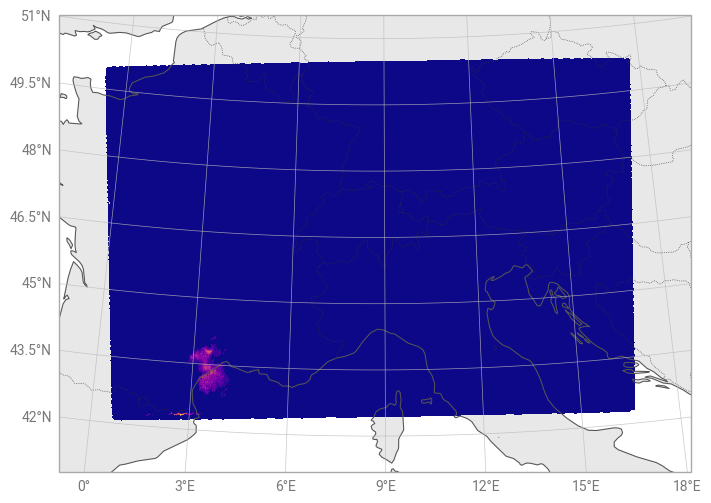

In [17]:
from earthkit.plots.geo import domains
import earthkit

icon_ch2_domain = domains.Domain.from_bbox(bbox=[xmin, xmax, ymin, ymax], name="CH2")
chart = earthkit.plots.Map(domain=icon_ch2_domain)

chart.block(prec_avg_geo, x="lon", y="lat")
chart.land()
chart.coastlines()
chart.borders()
chart.gridlines()
chart.show()